[100000000000000000000000000000, 100000000000000000000000000000, 100000000000000000000000000000, 10000000000000000000000000, 10000000000000000000000000]
[0, 0, 0, 250, 250, 0, 0, 0, 0, 300, 300, 0, 50, 0, 0, -300000, 0, 0, 0, 0, 0, 300000, 0, 0, -100000, -300000, 0, 0, 6000000, 0]


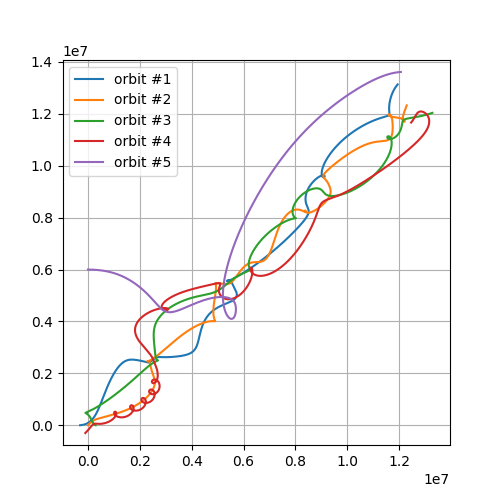

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

def runge_kutta_system(f, y0, t0, t_end, h):
    """
    Fourth-order Runge-Kutta method for solving a system of ODEs.
    
    Parameters:
        f: function representing the system of ODEs (dy/dt = f(t, y))
        y0: initial values of variables (as a list or numpy array)
        t0: initial value of t
        t_end: end value of t
        h: step size
        
    Returns:
        List of time values and numpy array of approximated y values for each variable at each time step.
    """
    t_values = []
    y_values = []
    t = t0
    y = np.array(y0)
    
    while t <= t_end:
        t_values.append(t)
        y_values.append(y)
        
        k1 = h * np.array(f(t, y))
        k2 = h * np.array(f(t + 0.5 * h, y + 0.5 * k1))
        k3 = h * np.array(f(t + 0.5 * h, y + 0.5 * k2))
        k4 = h * np.array(f(t + h, y + k3))
        
        y = y + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        t += h
    
    return t_values, np.array(y_values)







def n_body_ODE_system(time, y):
    # Vx1, Vy1, Vz1, Vx2, Vy2, ..., Rx1, Ry1, Rz1, Rx2, Ry2, ...
    # y will be of size n*6
    num = len(masses)
    bodies = []
    for nth in range(num):
        pos = []
        vel = []
        for v in range(3):
            vel.append(y[nth*3 + v])
        for x in range(3):
            pos.append(y[num*3 + nth*3 + x])
        bodies.append((pos,vel))
    # if(DEBUG): print(bodies)
    distances = {}
    
    accelerations = []
    new_positions = []
    
    for first in range(len(bodies)):
        acceleration = [0.0,0.0,0.0]
        for second in range(len(bodies)):
            if first != second:
                if(DEBUG): print("comparing",first,"with",second)
                if distances.get((first,second)) == None:
                    distance_squared = 0
                    for i in range(3):
                        distance_squared += (bodies[second][0][i] - bodies[first][0][i])**2
                    distance = distance_squared**(1/2)
                    distances[(first,second)] = distance
                    distances[(second,first)] = distance
                if(DEBUG): print("distance",distance)
                #= ((bodies[second].pos[0] - bodies[first].pos[0])**2 + (bodies[second].pos[1] - bodies[first].pos[1])**2 + (bodies[second].pos[2] - bodies[first].pos[2])**2)**(1/2)
                #distances.append( ((second.pos[0] - first.pos[0])**2 + (second.pos[1] - first.pos[1])**2 + (second.pos[2] - first.pos[2])**2)**(1/2))
                    #(for x in range(3): (second.pos[x] - first.pos[x])**2)**(1/2) ) 
                
                for i in range(3):
                    acceleration[i] += G* masses[second] * (bodies[second][0][i] - bodies[first][0][i]) / distances[(first,second)] **3
                if(DEBUG): print('current acc:', acceleration)
                if(DEBUG): print()
                
        accelerations += acceleration
    # print(distances)           
        
    # if DEBUG: print("accs:",accelerations)
    # for first in range(len(bodies)):
    #     acceleration = [0.0,0.0,0.0]
    #     for second in range(len(bodies)):
    #         for i in range(3):
    #             acceleration[i] += G* masses[second] * (bodies[second][0][i] - bodies[first][0][i]) / distance **3
    #     accelerations += acceleration
    
    new_radius = []
    for nth in range(num):
        new_radius += bodies[nth][1]
    # if(DEBUG): print("len of accs:",len(accelerations),"len of radius:",len(new_radius))
    # calculate accelerations
    # if(DEBUG): print(accelerations + new_radius)
    # return accelerations as an array
    return accelerations + new_radius

DEBUG = False
G = 6.67259*10**-20

masses = [10**29,10**29,10**29,10**25,10**25]

# Of format Vx, Rx
vectors = [
    [0,0,0],
    [-300000,0,0],
    [250,250,0],
    [0,0,0],
    [0,0,0],
    [300000,0,0],
    [300,300,0],
    [-100000,-300000,0],
    [50,0,0],
    [0,6000000,0]
]
VN = []
RN = []
for i in range(len(vectors)):
    if (i % 2 == 0):
        VN += vectors[i]
    else:
        RN += vectors[i]

y0 = VN + RN
t0 = 0
t_end = 150000
h = 1


print(masses)
print(y0)

t_values, y_values = runge_kutta_system( n_body_ODE_system, y0, t0, t_end, h)

# Clear vars when running again
# plt.clf()
# plt.cla()
# plt.close('all')

# Static Plot
plt.figure( figsize=(5,5) )

current = int(len(y_values[0])/2)

x_vals = []
y_vals = []
for x in range(len(masses)):
    x_val = y_values[:,current]
    x_vals.append(x_val)
    y_val = y_values[:,current+1]
    y_vals.append(y_val)
    plt.plot( x_val , y_val , label = 'orbit #' + str(x+1) )
    current += 3


plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

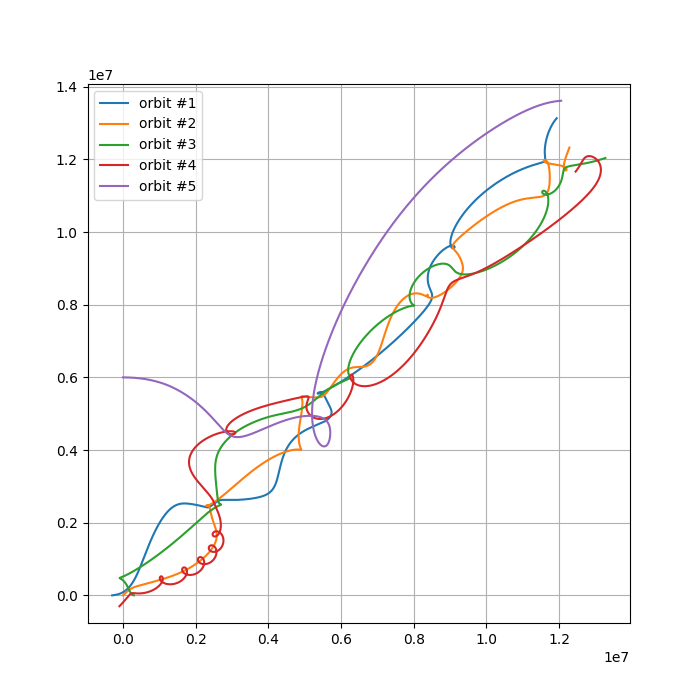

In [2]:
plt.figure( figsize=(7,7) )

for i in range(len(x_vals)):
    plt.plot( x_vals[i] , y_vals[i] , label = 'orbit #' + str(i+1) )

plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

5
200


(-1000000.0, 15000000.0)

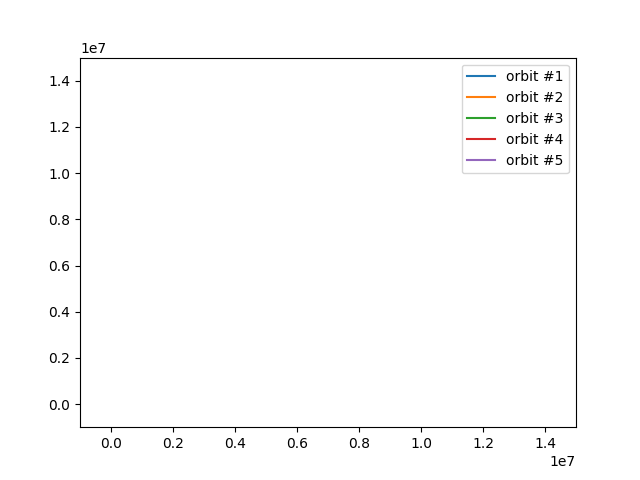

In [3]:
# Moving Plot
fig, ax = plt.subplots()
line_orbits = []
for i in range(len(masses)):
    line_orbit, = ax.plot( x_vals[i][0] , y_vals[i][0] , label = 'orbit #' + str(i+1) )
    line_orbits.append(line_orbit)

print(len(x_vals))
def animation_movie( frame ):
    for i, line in enumerate(line_orbits):
        line.set_xdata(x_vals[i][:frame])
        line.set_ydata(y_vals[i][:frame])
    return line_orbits

n_steps = int( ( t_end - t0 ) / h )

num_seconds_for_animation = 12
milliseconds_per_frame = 16

frame_interval = int((milliseconds_per_frame*n_steps)/(1000*num_seconds_for_animation))
print(frame_interval)

animation = FuncAnimation( fig , animation_movie , frames = range(0,n_steps,frame_interval) , interval = milliseconds_per_frame , blit = True )

ax.legend()
ax.set_xlim(-10**6,1.5*10**7)
ax.set_ylim(-10**6,1.5*10**7)

# animation.save()